In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filename = 'C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW4_Submission/wine.csv'
data = pd.read_csv(filename)
data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                          178 non-null int64
Alcohol                        178 non-null float64
Malic_acid                     178 non-null float64
Ash                            178 non-null float64
Alcalinity_of_ash              178 non-null float64
Magnesium                      178 non-null int64
Total_phenols                  178 non-null float64
Flavanoids                     178 non-null float64
Nonflavanoid_phenols           178 non-null float64
Proanthocyanins                178 non-null float64
Color_intensity                178 non-null float64
Hue                            178 non-null float64
OD280/OD315of_diluted_wines    178 non-null float64
Proline                        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
#Checking the correlations of features with respect to the target Class variable
corr=data.corr()
corr['Class'].sort_values(ascending=False)

Class                          1.000000
Alcalinity_of_ash              0.517859
Nonflavanoid_phenols           0.489109
Malic_acid                     0.437776
Color_intensity                0.265668
Ash                           -0.049643
Magnesium                     -0.209179
Alcohol                       -0.328222
Proanthocyanins               -0.499130
Hue                           -0.617369
Proline                       -0.633717
Total_phenols                 -0.719163
OD280/OD315of_diluted_wines   -0.788230
Flavanoids                    -0.847498
Name: Class, dtype: float64

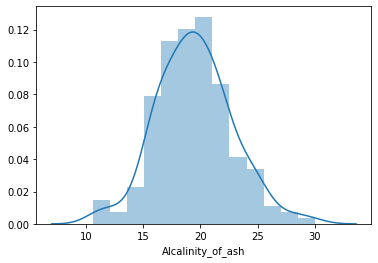

In [7]:
#looking at the distribution of most correlated feature-Alcalinity_of_ash with Class
sns.distplot(data.Alcalinity_of_ash)
plt.show()

In [10]:
# limiting the number of Alcalinity_of_ash sample category
data['Alcalinity_of_ash_sampledCat'] = np.ceil(data['Alcalinity_of_ash']/1.5)


In [11]:
#frequency of each category- got 13 category 
data.Alcalinity_of_ash_sampledCat.value_counts().sort_index()

8.0      4
9.0      2
10.0     6
11.0    21
12.0    30
13.0    32
14.0    34
15.0    23
16.0    11
17.0     9
18.0     3
19.0     2
20.0     1
Name: Alcalinity_of_ash_sampledCat, dtype: int64

In [12]:
data['Alcalinity_of_ash_sampledCat'].where(data['Alcalinity_of_ash_sampledCat']<15, 16.0, inplace=True)

In [13]:
#frequency merging some categories
data.Alcalinity_of_ash_sampledCat.value_counts().sort_index()

8.0      4
9.0      2
10.0     6
11.0    21
12.0    30
13.0    32
14.0    34
16.0    49
Name: Alcalinity_of_ash_sampledCat, dtype: int64